In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
vac = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County_2022.csv')


/tmp/ipykernel_3816741/2892443666.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vac = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County_2022.csv')


In [7]:
vac.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_18Plus,Booster_Doses_50Plus,Booster_Doses_65Plus,Booster_Doses_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,01/21/2022,01087,3,Macon County,AL,92.3,10506.0,58.1,10505.0,61.1,10381.0,64.8,9827.0,65.6,3304.0,87.3,45.8,8277,8277.0,48.1,8230.0,51.4,7804,52.1,2685,70.9,2704.0,2688.0,2215.0,1406.0,32.7,34.4,44.1,52.4,D,15.0,15.0,16.0,16.0,16.0,Non-metro,7.0,7.0,8.0,8.0,8.0
1,01/21/2022,12059,3,Holmes County,FL,98.6,6800.0,34.7,6795.0,36.7,6766.0,39.7,6584.0,42.1,2720.0,69.4,28.7,5627,5625.0,30.4,5608.0,32.9,5461,35.0,2319,59.1,1517.0,1509.0,1339.0,950.0,27.0,27.6,33.9,41.0,D,13.0,14.0,14.0,14.0,15.0,Non-metro,5.0,6.0,6.0,6.0,7.0
2,01/21/2022,12071,3,Lee County,FL,98.6,544213.0,70.6,544119.0,74.0,536194.0,78.4,513912.0,80.7,227563.0,95.0,60.0,462612,462607.0,62.9,457764.0,66.9,438763,68.9,197400,87.9,183413.0,181904.0,154592.0,108936.0,39.6,41.5,50.0,55.2,C,12.0,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0,4.0
3,01/21/2022,05003,3,Ashley County,AR,90.4,11195.0,57.0,11194.0,60.3,10985.0,65.5,10334.0,67.7,3590.0,87.2,48.3,9487,9487.0,51.1,9386.0,55.9,8855,58.0,3168,77.0,3143.0,3103.0,2603.0,1716.0,33.1,35.0,45.1,54.2,D,15.0,16.0,16.0,16.0,16.0,Non-metro,7.0,8.0,8.0,8.0,8.0
4,01/21/2022,18041,3,Fayette County,IN,98.6,9799.0,42.4,9799.0,44.9,9698.0,48.6,9355.0,51.7,3660.0,77.2,38.3,8837,8837.0,40.5,8792.0,44.1,8504,47.0,3495,73.7,3594.0,3567.0,3016.0,2130.0,40.7,41.9,51.3,60.9,C,10.0,11.0,11.0,11.0,12.0,Non-metro,6.0,7.0,7.0,7.0,8.0


In [5]:
feat = pd.read_csv('../data/census_cbg_with_predicted_hesitancy_vaccincation.csv')

In [6]:
print(len(feat))
pd.set_option('display.max_columns', None)
# Drop the features that are probably not going to be useful
feat = feat.drop(columns=['state', 'census_block_group_str', 'census_county', 'state_fips'])
feat = feat[feat['total_population'] > 10] # Drop CBGs with too few people
feat = feat.dropna() 
print(len(feat))
feat.head()

215196
215162


,census_block_group,total_households,M,F,age0,age1,age2,age3,age4,age5,age6,age7,age8,M0,M1,M2,M3,M4,M5,M6,M7,M8,F0,F1,F2,F3,F4,F5,F6,F7,F8,race_white,race_black,race_indian,race_asian,race_pacific,income_0,income_1,income_2,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12,income_13,income_14,income_15,M_Ed0,M_Ed1,M_Ed2,M_Ed3,M_Ed4,M_Ed5,M_Ed6,M_Ed7,M_Ed8,M_Ed9,M_Ed10,M_Ed11,M_Ed12,M_Ed13,M_Ed14,M_Ed15,F_Ed0,F_Ed1,F_Ed2,F_Ed3,F_Ed4,F_Ed5,F_Ed6,F_Ed7,F_Ed8,F_Ed9,F_Ed10,F_Ed11,F_Ed12,F_Ed13,F_Ed14,F_Ed15,Ed0,Ed1,Ed2,Ed3,Ed4,Ed5,Ed6,Ed7,Ed8,Ed9,Ed10,Ed11,Ed12,Ed13,Ed14,Ed15,longitude,latitude,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,total_population,Estimated hesitant or unsure,Estimated hesitant,percent_fully_vaccinated
0,10010201001,193,0.477852,0.522148,0.179866,0.097987,0.124832,0.155705,0.116779,0.220134,0.088591,0.016107,0.000000,0.221910,0.064607,0.106742,0.154494,0.058989,0.238764,0.154494,0.000000,0.000000,0.141388,0.128535,0.141388,0.156812,0.169666,0.203085,0.028278,0.030848,0.000000,0.785235,0.214765,0.000000,0.000000,0.000000,0.088083,0.025907,0.036269,0.062176,0.139896,0.025907,0.000000,0.025907,0.000000,0.036269,0.196891,0.181347,0.031088,0.150259,0.000000,0.000000,0.000000,0.000000,0.104072,0.000000,0.239819,0.000000,0.022624,0.000000,0.357466,0.031674,0.027149,0.018100,0.149321,0.049774,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.023715,0.019763,0.043478,0.276680,0.023715,0.324111,0.043478,0.106719,0.047431,0.027668,0.063241,0.000000,0.000000,0.048523,0.000000,0.111814,0.012658,0.021097,0.023207,0.314346,0.027426,0.185654,0.031646,0.126582,0.048523,0.014768,0.033755,-86.493804,32.466536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,745,0.273205,0.189945,21.875892
1,10010201002,390,0.505138,0.494862,0.060870,0.192095,0.118577,0.091700,0.166798,0.186561,0.119368,0.050593,0.013439,0.014085,0.244131,0.153365,0.092332,0.142410,0.178404,0.112676,0.045383,0.017214,0.108626,0.138978,0.083067,0.091054,0.191693,0.194888,0.126198,0.055911,0.009585,0.905518,0.086957,0.000000,0.007525,0.000000,0.000000,0.038462,0.035897,0.000000,0.010256,0.046154,0.048718,0.007692,0.048718,0.064103,0.130769,0.248718,0.120513,0.069231,0.120513,0.010256,0.017857,0.000000,0.000000,0.000000,0.056122,0.010204,0.017857,0.007653,0.293367,0.022959,0.132653,0.040816,0.193878,0.150510,0.045918,0.010204,0.000000,0.0,0.000000,0.000000,0.011574,0.013889,0.009259,0.013889,0.351852,0.027778,0.196759,0.041667,0.185185,0.136574,0.000000,0.011574,0.008495,0.000000,0.000000,0.000000,0.032767,0.012136,0.013350,0.010922,0.324029,0.025485,0.166262,0.041262,0.189320,0.143204,0.021845,0.010922,-86.493878,32.489012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1265,0.226187,0.149921,25.373428
2,10010202001,244,0.556250,0.443750,0.110417,0.221875,0.093750,0.104167,0.138542,0.122917,0.093750,0.079167,0.035417,0.153558,0.303371,0.114232,0.080524,0.059925,0.168539,0.046816,0.073034,0.000000,0.056338,0.119718,0.068075,0.133803,0.237089,0.065728,0.152582,0.086854,0.079812,0.383227,0.602972,0.000000,0.000000,0.013800,0.110656,0.151639,0.086066,0.000000,0.057377,0.016393,0.016393,0.012295,0.000000,0.016393,0.114754,0.364754,0.036885,0.016393,0.000000,0.000000,0.035857,0.015936,0.000000,0.000000,0.067729,0.000000,0.091633,0.011952,0.254980,0.199203,0.163347,0.000000,0.123506,0.000000,0.035857,0.000000,0.000000,0.0,0.042735,0.017094,0.000000,0.011396,0.113960,0.000000,0.564103,0.056980,0.065527,0.042735,0.065527,0.019943,0.000000,0.000000,0.014950,0.006645,0.024917,0.009967,0.028239,0.006645,0.104651,0.004983,0.435216,0.116279,0.106312,0.024917,0.089701,0.011628,0.014950,0.000000,-86.474237,32.479703,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,960,0.

In [8]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215162 entries, 0 to 215195
Columns: 156 entries, census_block_group to percent_fully_vaccinated
dtypes: float64(103), int64(53)
memory usage: 257.7 MB


In [ ]:
vac = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County_2022.csv')
vac_date = '01/20/2022'
vac = vac[vac['Date'] == vac_date]    
 # 

<AxesSubplot:>

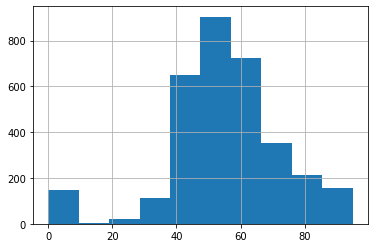

In [19]:
vac['Administered_Dose1_Pop_Pct'].hist()

<AxesSubplot:>

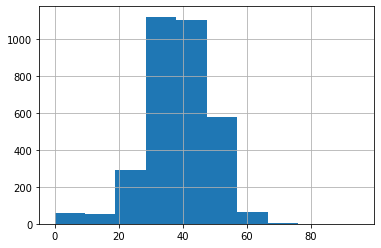

In [10]:
vac['Booster_Doses_Vax_Pct'].hist()

In [11]:
print(len(vac))
vac = vac[vac['FIPS'].apply(pd.to_numeric, errors='coerce').notna()]   # Remove any unusual FIPS that cannot be converted to a number
vac = vac[vac['Series_Complete_Pop_Pct'] > 2.0]   # All counties should have vac rate > 2% now, anything less should be corrupted 
vac = vac.drop(['Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Series_Complete_Yes',
                'Administered_Dose1_Recip', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_12PlusPop_Pct', 
                'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_18PlusPop_Pct', 'Administered_Dose1_Recip_65Plus', 'Administered_Dose1_Recip_65PlusPop_Pct'], axis=1)
vac = vac.set_index('FIPS')
print(len(vac))

3283
3193


In [18]:
texas_counties_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County.csv',
                                dtype={'FIPS': object}, parse_dates=['Date'])
texas_counties_df = texas_counties_df.loc[texas_counties_df['Recip_State']=='TX']
texas_counties_df = texas_counties_df.loc[texas_counties_df['Date'] == vac_date]
# drop bad counties
texas_counties_df = texas_counties_df.loc[texas_counties_df['FIPS'] != 'UNK']
print('Shape of Texas counties df: {}'.format(texas_counties_df.shape))

# generate county populations so we can compute percentage of vaccination
texas_pop_df = pd.read_csv('../data/cc-est2019-agesex-48.csv')
# get the latest estimates of population (YEAR=12 correspondint to 7/1/2019 population estimate)
texas_pop_df = texas_pop_df.loc[texas_pop_df['YEAR']==12]
texas_pop_df = texas_pop_df[['CTYNAME', 'POPESTIMATE', 'AGE16PLUS_TOT', 'AGE65PLUS_TOT']]
texas_pop_df = texas_pop_df.rename({'CTYNAME': 'Recip_County', 'POPESTIMATE': 'total_population',
                                    'AGE16PLUS_TOT': '16older_population', 'AGE65PLUS_TOT': '65older_population',
                                   }, axis=1)


Shape of Texas counties df: (0, 22)


In [17]:
# Get texas data
texas_vaccine_df = pd.read_excel('../data/texas-07-01-2021.xlsx', sheet_name='By County, Age')
# print(texas_vaccine_df.head())
texas_vaccine_df = texas_vaccine_df.drop('Doses Administered', axis=1)
texas_vaccine_df = texas_vaccine_df.rename({'County Name ': 'Recip_County',
                                            'Age Group': 'age_group',
                                            'People Vaccinated with at least One Dose': 'one_dose',
                                            'People Fully Vaccinated ': 'fully_vaccinated'}, axis=1)
texas_vaccine_df['Recip_County'] =  texas_vaccine_df['Recip_County'] + ' County'
texas_vaccine_df = texas_vaccine_df.pivot_table(index=['Recip_County'], columns='age_group',
                                                values=['one_dose', 'fully_vaccinated'])
texas_vaccine_df.columns = ['_'.join(col) for col in texas_vaccine_df.columns.values]
texas_vaccine_df = texas_vaccine_df.drop(['fully_vaccinated_Total',
                                          'one_dose_16-49 years', 'one_dose_50-64 years',
                                          'one_dose_65-79 years', 'one_dose_80+ years',
                                          'one_dose_Total', 'one_dose_Unknown'], axis=1)

texas_vaccine_df['fully_vaccinated_Unknown'] = texas_vaccine_df['fully_vaccinated_Unknown'].fillna(0)
texas_vaccine_df = texas_vaccine_df.drop(['Grand Total County', 'Other County'], axis=0)
texas_vaccine_df['fully_vaccinated'] = (texas_vaccine_df['fully_vaccinated_16-49 years'] +
                                        texas_vaccine_df['fully_vaccinated_50-64 years'] +
                                        texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                        texas_vaccine_df['fully_vaccinated_80+ years'] +
                                        texas_vaccine_df['fully_vaccinated_Unknown'])
texas_vaccine_df['fully_vaccinated_16older'] = (texas_vaccine_df['fully_vaccinated_16-49 years'] +
                                                texas_vaccine_df['fully_vaccinated_50-64 years'] +
                                                texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                                texas_vaccine_df['fully_vaccinated_80+ years'])
texas_vaccine_df['fully_vaccinated_65older'] = (texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                                texas_vaccine_df['fully_vaccinated_80+ years'])
print('Original shape of texas vaccines data: {}'.format(texas_vaccine_df.shape))
texas_vaccine_df = texas_vaccine_df.reset_index().merge(texas_counties_df,
                                                        left_on='Recip_County', right_on='Recip_County',
                                                        how='inner').set_index('Recip_County')
print('Shape of texas vaccines data after joinging with CDC texas counties: {}'.format(texas_vaccine_df.shape))

texas_vaccine_df = texas_vaccine_df.merge(texas_pop_df, left_index=True, right_on='Recip_County', how='inner')
print('Shape of texas vaccines data after joinging with census pouplations: {}'.format(texas_vaccine_df.shape))

# Prepare Texas data so it looks exactly like the CDC data for other states
texas_vaccine_df['Date'] = vac_date
texas_vaccine_df['Recip_State'] = 'TX'
texas_vaccine_df['Completeness_pct'] = 100.0
texas_vaccine_df['Series_Complete_Pop_Pct'] = (texas_vaccine_df['fully_vaccinated'] * 100.0 /
                                                texas_vaccine_df['total_population'])
# texas has no data on 12 years old, so we set the column to NULL to at least have same columns as CDC
# Texas does not have vaccination for 18 years or older but CDC data does, so for sake of consistency between 
# two datasets we use fraction of 16 years or older in Texas as 18 years or older
texas_vaccine_df['Series_Complete_18PlusPop_Pct'] = (texas_vaccine_df['fully_vaccinated_16older'] * 100.0 /
                                                        texas_vaccine_df['16older_population'])
texas_vaccine_df['Series_Complete_65PlusPop_Pct'] = (texas_vaccine_df['fully_vaccinated_65older'] * 100.0 /
                                                        texas_vaccine_df['65older_population'])
texas_vaccine_df = texas_vaccine_df.set_index('FIPS')
texas_vaccine_df = texas_vaccine_df[['Date', 'Recip_County', 'Recip_State', 'Completeness_pct', 'Series_Complete_Pop_Pct',
                                     'Series_Complete_18PlusPop_Pct',
                                     'Series_Complete_65PlusPop_Pct']]

texas_vaccine_df

Original shape of texas vaccines data: (254, 10)
Shape of texas vaccines data after joinging with CDC texas counties: (0, 31)
Shape of texas vaccines data after joinging with census pouplations: (0, 35)


,Date,Recip_County,Recip_State,Completeness_pct,Series_Complete_Pop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct
FIPS,,,,,,,


In [15]:
print('Shape of county vaccine data before append: {}'.format(vac.shape))
vac = vac.append(texas_vaccine_df, verify_integrity=True)
print('Shape of county vaccine data after append: {}'.format(vac.shape))

Shape of county vaccine data before append: (1036926, 33)


NameError: name 'texas_vaccine_df' is not defined

In [ ]:
vac['Booster_Doses_Vax_Pct'].hist()

In [12]:
features = {}  # Predictive features
labels = {}    # Vaccination rate of counties
cbg = {}       # The CBGs in a county, used to map the data back into a pandas table later on 
num_zero = 0
for fips in list(vac.index.values):  # enumerate all fips, which are currently the indices
    subset = feat[(feat['census_block_group'].astype(int) // 10000000) == int(fips)]
    if len(subset) == 0:
        num_zero += 1
        continue
    features[fips] = subset.to_numpy()[:, 3:-3]   # Get the array of input features for all CBGs in a county
  
    labels[fips] = vac['Booster_Doses_Vax_Pct'][fips] / vac['Completeness_pct'][fips] * 100   # Infer the missing data by assuming that the missing population have same vac rate
    cbg[fips] = subset['census_block_group']      # Take out the CBG entry   
    assert not np.isnan(features[fips].sum())
    assert not np.isnan(labels[fips])
print(num_zero)

79


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

device = torch.device('cuda:0')

In [14]:
# Convert everything to pytorch tensors once and for all
weights = {}
for key in features:
    features[key] = torch.tensor(features[key], device=device, dtype=torch.float32)
    labels[key] = torch.tensor(labels[key], device=device, dtype=torch.float32)
    weights[key] = features[key][:, -1] / features[key][:, -1].sum()   # Weighting by population
    
    features[key][:, -1] = features[key][:, -1].log() 

In [15]:
# For final output do this instead. Do not use this for performance measurement unless you want to train on the test set
train_features, test_features = features, features
train_labels, test_labels = labels, labels
train_weights, test_weights = weights, weights
train_cbg, test_cbg = cbg, cbg 
do_test = False

In [16]:

class NetworkFC(nn.Module):
    def __init__(self, x_dim, out_dim=1, num_feat=20):
        super(NetworkFC, self).__init__()
        self.fc1 = nn.Linear(x_dim, num_feat)
        self.fc2 = nn.Linear(num_feat, num_feat)
        self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(num_feat, out_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.drop(x)
        out = self.fc3(x)
        return torch.sigmoid(out) * 100


In [17]:

class NetworkFC2(nn.Module):
    def __init__(self, x_dim, out_dim=1, num_feat=20):
        super(NetworkFC2, self).__init__()
        self.fc1 = nn.Linear(x_dim, num_feat)
        # self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(num_feat, out_dim)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        # x = self.drop(x)
        out = self.fc3(x)
        return out
    
class NetworkFC2Drop(nn.Module):
    def __init__(self, x_dim, out_dim=1, num_feat=20):
        super(NetworkFC2Drop, self).__init__()
        self.fc1 = nn.Linear(x_dim, num_feat)
        self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(num_feat, out_dim)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.drop(x)
        out = self.fc3(x)
        return out


class NetworkFC3(nn.Module):
    def __init__(self, x_dim, out_dim=1, num_feat=20):
        super(NetworkFC3, self).__init__()
        self.fc1 = nn.Linear(x_dim, num_feat)
        self.fc2 = nn.Linear(num_feat, num_feat)
        self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(num_feat, out_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        # x = self.drop(x)
        out = self.fc3(x)
        return out

In [18]:
class NetworkLinear(nn.Module):
    def __init__(self, x_dim, out_dim=1):
        super(NetworkLinear, self).__init__()
        self.fc1 = nn.Linear(x_dim, out_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        return out
    
class NetworkLogistic(nn.Module):
    def __init__(self, x_dim, out_dim=1):
        super(NetworkLogistic, self).__init__()
        self.fc1 = nn.Linear(x_dim, out_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        return torch.sigmoid(out) * 100

In [19]:
cbg2zip = np.load('../data/cbg2zip.npy', allow_pickle=True).item()
cbg_size_table = pd.read_csv('../cbg_size_table.csv')
df_cbg2zip = pd.DataFrame.from_dict([{'cbg': k, 'zip': cbg2zip[k]} for k in cbg2zip])
truth = pd.read_csv('../data/state_vax/agg.csv')

def validate_zip(df, key_pred, key_cbg):
    #     df = pd.read_csv('../vac_inferred_lvm_2022.csv')
    #     key_cbg = 'census_block_group'
    #     key_pred = 'vac_rate_inferred_0'
    df = copy.deepcopy(df)
    df = df.merge(df_cbg2zip, left_on=key_cbg, right_on='cbg')
    df = df.merge(cbg_size_table, on='census_block_group')
    df[key_pred+'_vax_total'] = df[key_pred] * df['size']
    zip_agg_pred = df.groupby('zip')[[key_pred+'_vax_total', 'size']].sum().reset_index()
    zip_agg_pred['pred'] = zip_agg_pred[key_pred+'_vax_total']/zip_agg_pred['size']
    zip_agg_pred['pred'] = zip_agg_pred['pred'] / 100
    zip_agg_pred = zip_agg_pred.merge(truth, left_on='zip', right_on='zip_code')
    return np.mean(np.abs(zip_agg_pred['pred'] - zip_agg_pred['vax'])), np.sum(np.abs(zip_agg_pred['pred'] - zip_agg_pred['vax']) * zip_agg_pred['size']) / np.sum(zip_agg_pred['size'])

import copy


In [20]:
# Obtain the data table that corresponds to the inferred vaccination rates
def get_results(net):
    array = []
    net.train(False)
    with torch.no_grad():
        for key in features:
            adjusted = net(features[key]).flatten()   # Get the initial results 
            for repeat in range(10):   # Normalize so that the average match county level averages, and clip the values between 0-100
                # Need iterated projection because we need to satisfy two conditions simultaneously
                adjusted = adjusted / (adjusted * weights[key]).sum() * labels[key]
                adjusted = adjusted.clamp(min=0, max=100)
            adjusted = adjusted.cpu().numpy()
            array.append(pd.DataFrame({'census_block_group': cbg[key], 'vac_rate_inferred': adjusted, 
                                       'vac_rate_county': labels[key].cpu().numpy() * np.ones_like(adjusted)}))
    result = pd.concat(array)
    return result

In [23]:
# Code to generate vac_inferred_v3
from torch.nn import functional as F 
import time 

start_time = time.time() 

# net = NetworkFC2(x_dim=150, num_feat=50).to(device)
# net = NetworkLinear(x_dim=150).to(device)

do_test = True
val_results_all = []

for repeat in range(1):
    val_results = []
    net = NetworkFC(x_dim=150).to(device)
    optim = torch.optim.Adam(net.parameters(), lr=1e-3) 
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=20, gamma=0.5)

    for epoch in range(20):
        net.train(True)
        train_loss_all = 0.0
        for key in train_features:
            optim.zero_grad()
            pred = net(train_features[key])
            loss = (((pred * train_weights[key].view(-1, 1)).sum(dim=0) - train_labels[key]) / 100).pow(2) 
            # Add a penalty if the vaccination rate is greater than 99 since that is unlikely
            #(F.relu(pred - 95.) / 10).pow(2).sum() + 
            reg = (F.relu(pred - 99.)).pow(2).sum() 

    #         for w in net.parameters():
    #             reg = reg + w.norm(1) * 5e-6

            loss = loss + reg 

            loss.backward()
            train_loss_all += (((net(train_features[key]) * train_weights[key].view(-1, 1)).sum(dim=0) - train_labels[key]) / 100).abs().detach()
            optim.step()

        if do_test:
            net.train(False) 
            test_loss_all = 0.0
            with torch.no_grad():
                for key in test_features:
                    test_loss_all += (((net(test_features[key]) * test_weights[key].view(-1, 1)).sum(dim=0) - test_labels[key]) / 100).abs()
        else:
            test_loss_all = 0.0

        #test_loss_all = train_loss_all 
        scheduler.step()
        print("Epoch %d, train_loss=%.4f, reg=%.4f, test_loss=%.4f, time=%.2f" % (epoch, train_loss_all / len(train_features), reg, test_loss_all / len(test_features), time.time() - start_time))

        # Visualize performance 
        result = get_results(net) 
        val_results.append(validate_zip(result, 'vac_rate_inferred', 'census_block_group'))
#         if epoch % 10 == 0:
#             plt.hist(result['vac_rate_inferred'].to_numpy(), bins=50)
#             plt.title('%f' % result['vac_rate_inferred'].to_numpy().std())
#             # plt.savefig('vacc_hist_06-15-2021.png')
#             plt.show()
        
        # print(validate_zip(result, 'vac_rate_county', 'census_block_group'))
        # result = get_results(net) 
        # result.to_csv('../data/vac_inferred_lvm_2022.csv')
    val_results = np.array(val_results)
    val_results_all.append(val_results)
    print(val_results_all[-1])
#     if epoch == 13:
#         break
# Linear: 0.0903 
# Linear with weight decay=0.001: 0.0986
# FC with 50 units: 0.0893
# FC with 50 units and weight decay 0.0904
# FC2 with 50 units and linear output: 0.0897
# Linear with 
# Trivial: 0.0989


Epoch 0, train_loss=0.0671, reg=0.0000, test_loss=0.0496, time=9.77
Epoch 1, train_loss=0.0529, reg=0.0000, test_loss=0.0439, time=24.51
Epoch 2, train_loss=0.0497, reg=0.0000, test_loss=0.0427, time=39.83
Epoch 3, train_loss=0.0485, reg=0.0000, test_loss=0.0413, time=55.15
Epoch 4, train_loss=0.0473, reg=0.0000, test_loss=0.0419, time=70.13
Epoch 5, train_loss=0.0468, reg=0.0000, test_loss=0.0397, time=84.07
Epoch 6, train_loss=0.0459, reg=0.0000, test_loss=0.0410, time=98.97
Epoch 15, train_loss=0.0435, reg=0.0000, test_loss=0.0399, time=233.10
Epoch 16, train_loss=0.0431, reg=0.0000, test_loss=0.0397, time=249.35
Epoch 17, train_loss=0.0428, reg=0.0000, test_loss=0.0391, time=265.00
Epoch 18, train_loss=0.0436, reg=0.0000, test_loss=0.0381, time=278.60
Epoch 19, train_loss=0.0431, reg=0.0000, test_loss=0.0401, time=293.18
[[0.22141084 0.27263791]
 [0.22039574 0.27259347]
 [0.2198649  0.27258187]
 [0.21917386 0.27260046]
 [0.21918883 0.27252877]
 [0.21841541 0.27253899]
 [0.21908962 

In [ ]:
result = get_results(net) 

result.to_csv('../results/fc_booster.csv')

In [44]:
dict_param = np.load('../data/dict_param_all_12.npy', allow_pickle=True).item()

In [63]:
cbgs_to_idxs = dict_param['cbgs_to_idxs']

vax_lm = {}
vax_lm['original'] = np.zeros(len(cbgs_to_idxs))

for i, row in result.iterrows():
    census_block_group = row['census_block_group'] 
    if int(census_block_group) in cbgs_to_idxs:
        vax_lm['original'][cbgs_to_idxs[int(census_block_group)]] = row['vac_rate_inferred'] / 100

In [64]:
np.save('../results/linear_vax.npy', vax_lm)

In [65]:
vax_lm

{'original': array([0.5247216 , 0.58190796, 0.62283779, ..., 0.83108093, 0.77714943,
        0.85304962])}

In [52]:
val_results_all = np.array(val_results_all)
np.save('../results/validation/linear.npy', val_results_all)

In [33]:
val_results_all = np.array(val_results_all)

In [34]:
print(val_results_all)

[[[0.14086259 0.09787289]
  [0.13984313 0.0966141 ]
  [0.13889979 0.09550132]
  [0.13805228 0.09454929]
  [0.13728851 0.09373945]
  [0.13659767 0.09302888]
  [0.13597129 0.09240918]
  [0.13540697 0.09188709]
  [0.13490757 0.09145351]
  [0.13446575 0.09109156]
  [0.13407838 0.09080973]
  [0.13374663 0.09060427]
  [0.13346254 0.09045504]
  [0.13322731 0.09036295]
  [0.13302452 0.09029985]
  [0.13284996 0.09026865]
  [0.1326997  0.09026399]
  [0.13257001 0.09027686]
  [0.13246181 0.09030882]
  [0.13237115 0.09035091]]]
